In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [28]:
# Load the Titanic dataset
titanic_data = pd.read_csv('E://intern//data//titanic.csv')


In [29]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [31]:
titanic_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [32]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [33]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

In [34]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

Split the data into training and testing sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Initialize the Gaussian Naive Bayes classifier
model1 = GaussianNB()

# Train the classifier
model1.fit(X_train, y_train)


GaussianNB()

In [58]:
# Predict on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Confusion Matrix:
[[  1 104]
 [  0  74]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       105
           1       0.42      1.00      0.59        74

    accuracy                           0.42       179
   macro avg       0.71      0.50      0.30       179
weighted avg       0.76      0.42      0.25       179



c:\Users\KRISHNA KANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

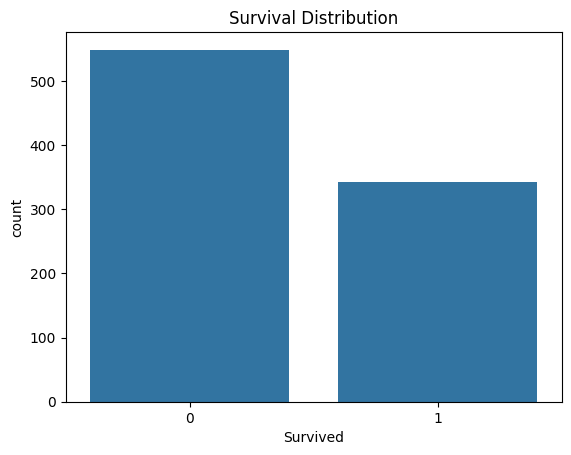

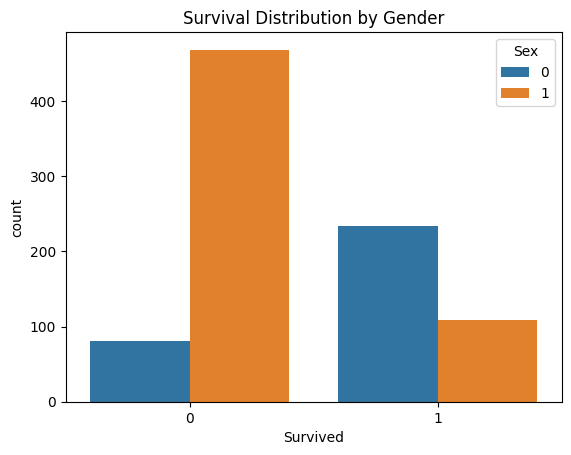

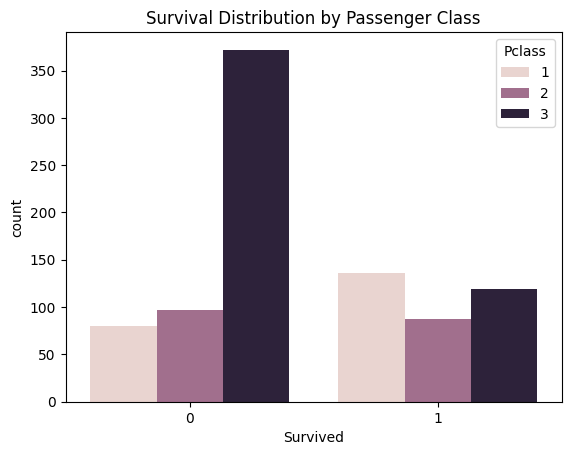

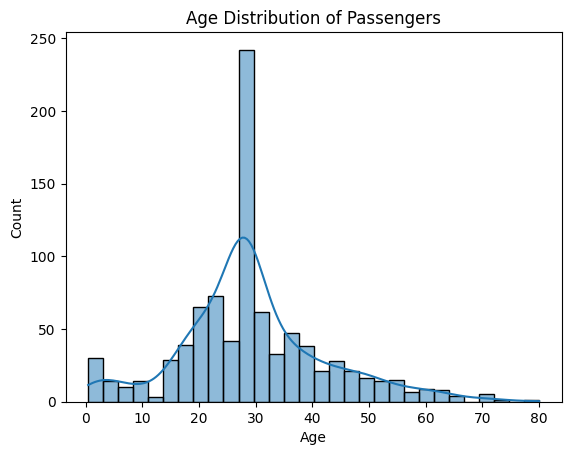

In [60]:
# Visualize the distribution of survived and not survived passengers
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Distribution')
plt.show()

# Visualize the distribution of survival by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Distribution by Gender')
plt.show()

# Visualize the distribution of survival by passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Distribution by Passenger Class')
plt.show()

# Visualize the age distribution of passengers
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


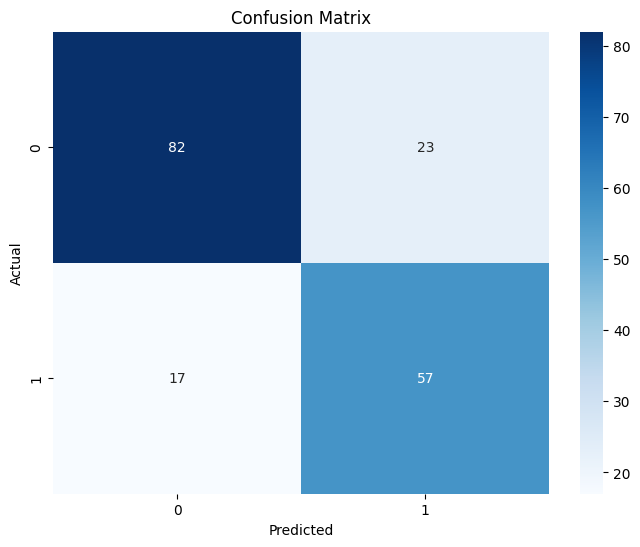

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [61]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.41899441340782123
